In [0]:
!pip install quadprog
!chmod +x run_experiments.sh

  Created wheel for quadprog: filename=quadprog-0.1.7-cp36-cp36m-linux_x86_64.whl size=307315 sha256=a8c58543183f5f92117d47d67c981b5a689603ccefe262369fb193e42fc90cca
  Stored in directory: /root/.cache/pip/wheels/36/dd/b1/849989444c0a5930927b260663019b7da6cff864fc224c2747
Successfully built quadprog
chmod: cannot access 'run_experiments.sh': No such file or directory


In [0]:
!./run_experiments.sh

/bin/bash: ./run_experiments.sh: No such file or directory


In [0]:
ls

sample_data/


In [0]:
#!/bin/bash

MY_PYTHON="python"
MNIST_ROTA="--n_layers 4 --n_hiddens 100 --data_path data/ --save_path results/ --n_epochs 1 --batch_size 10 --log_every 100 --samples_per_task 1500 --data_file mnist_rotations.pt    --cuda no  --seed 0"


In [0]:
# build datasets
cd $MY_PYTHON raw.py

cd ..

$MY_PYTHON mnist_rotations.py \
	--o mnist_rotations.pt\
	--seed 0 \
	--min_rot 0 \
	--max_rot 180 \
	--n_tasks 20

cd ..
# model "single"
#$MY_PYTHON main.py $MNIST_ROTA --model single --lr 0.003

# model "independent"
#$MY_PYTHON main.py $MNIST_ROTA --model independent --lr 0.1  --finetune yes 

# model "multimodal"
#$MY_PYTHON main.py $MNIST_ROTA  --model multimodal --lr 0.1
#$MY_PYTHON main.py $MNIST_ROTA  --model multimodal --lr 0.05

# model "GEM"
#$MY_PYTHON main.py $MNIST_ROTA --model gem --lr 0.1 --n_memories 256 --memory_strength 0.5
#$MY_PYTHON main.py $MNIST_ROTA --model gem --lr 0.1 --n_memories 512 --memory_strength 1
$MY_PYTHON main.py $MNIST_ROTA --model gem --lr 0.1 --n_memories 512 --memory_strength 2

# plot results
#cd results/
#$MY_PYTHON plot_results.py
#cd ..data/
cd raw/



SyntaxError: ignored

In [1]:
gem_acc = [10.6, 42.98, 78.89, 79.98, 86.66, 84.7, 81.99, 80.01, 79.5, 78.88]
gem_acc

[10.6, 42.98, 78.89, 79.98, 86.66, 84.7, 81.99, 80.01, 79.5, 78.88]

In [0]:
import matplotlib.pyplot as plt


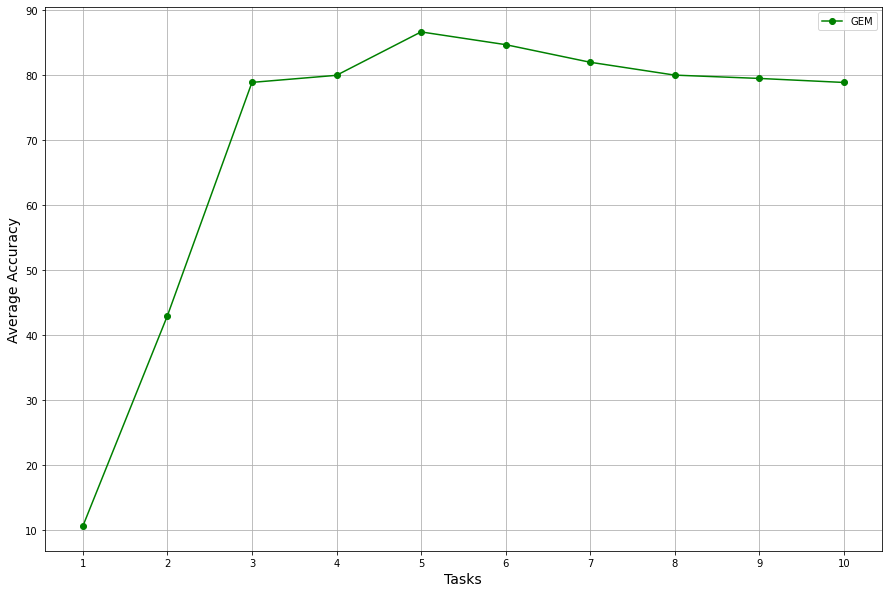

In [4]:
fig, ax = plt.subplots(figsize = (15,10))
plt.plot([1, 2, 3,4,5,6,7,8,9,10], gem_acc, '-o', label="GEM", color = 'g')
plt.xlabel('Tasks', fontsize=14)
plt.ylabel('Average Accuracy', fontsize=14)

ax.grid()
# plt.title('CL Strategies Comparison on MNIST', fontsize=14);
plt.xticks([1,2,3,4,5,6,7,8,9,10])
plt.legend(prop={'size': 10});